<a href="https://colab.research.google.com/github/JozefSL/pyNotes/blob/main/Prophet/US_wPropaneExports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet
# about 90 seconds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 3.0 MB/s 
     |████████████████████████████████| 45 kB 1.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641932 sha256=d0a198fb8c7fbb8dd67462e3ddc97f6d90652154a604cf61bf8cd197c626ef14
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
import pandas as pd
import altair as alt
from prophet import Prophet

In [3]:
r = 'https://www.eia.gov/opendata/qb.php?sdid=PET.W_EPLLPZ_EEX_NUS-Z00_MBBLD.W'
data = pd.read_html(r)
#data is nested list of keys for a pandas series.
print(data[0][:].keys())
SeriesName = data[0]['Series Name'][0] # type of series
#Period = data[0]['Period'][:] # all the monthly time points
#Units = data[0]['Units'][:] # unit type
#Value = data[0]['Value'][:] # all the monthly values
df = data[0][['Period','Value']][:]

Index(['Series Name', 'Period', 'Frequency', 'Value', 'Units'], dtype='object')


In [4]:
df['Period']  = pd.to_datetime(df.Period, format='%Y%m%d', errors='coerce').dropna()
df.columns = ['ds','y']
df.head()

,ds,y
0,2022-05-13,1313
1,2022-05-06,1195
2,2022-04-29,1205
3,2022-04-22,1397
4,2022-04-15,1205


In [5]:
df= df[df.ds > '2016-08-31']

In [6]:
df.tail(3)

,ds,y
295,2016-09-16,1075
296,2016-09-09,424
297,2016-09-02,503


In [7]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


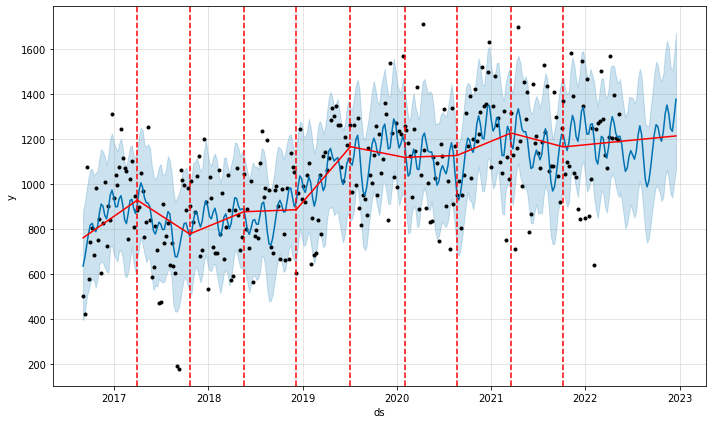

In [14]:
m = Prophet(n_changepoints=10, seasonality_mode='multiplicative',changepoint_prior_scale=8, changepoint_range=0.999, seasonality_prior_scale=15.95, weekly_seasonality=False).fit(df)
future = m.make_future_dataframe(periods=32, freq='W')
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

In [15]:
plot_components_plotly(m, fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


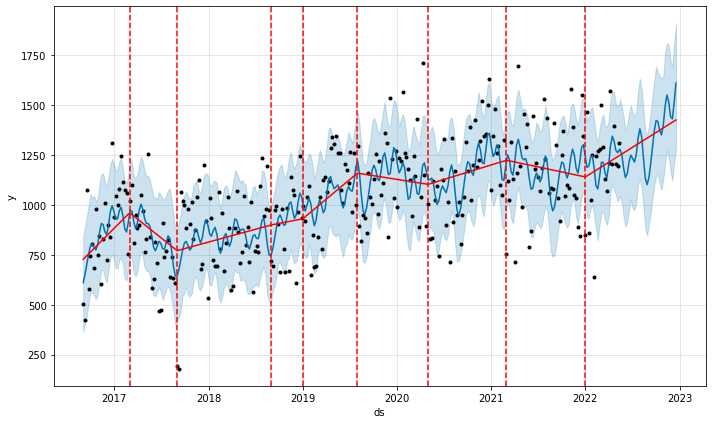

In [18]:
m2 = Prophet(changepoints=['2017-03-01', '2017-09-01', '2018-09-01', '2019-01-01', '2019-08-01', '2020-03-01', '2020-05-01', '2021-03-01', '2022-01-01'], seasonality_mode='multiplicative',changepoint_prior_scale=1.99, changepoint_range=0.08, seasonality_prior_scale=0.5).fit(df)
future2 = m2.make_future_dataframe(periods=32, freq='W')
fcst2 = m2.predict(future2)
fig2 = m2.plot(fcst2)
a = add_changepoints_to_plot(fig2.gca(), m2, fcst2)

In [19]:
plot_components_plotly(m2, fcst2)